# **Bigmart Sales Prediction**

**1. Problem Statement:** 

The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Using this predictive model, the Bigmart will be able to focus more on the products which have high sales and 
figure out which products have low sales to understand that issue as well.

This dataset is named BigMart Sales. The dataset contains a set of 8,523 records under 12 attributes:

Column Name and their Description

* Item_Identifier: Unique product ID
* Item_Weight : Weight of product
* Item_Fat_Content : Checks the Concentration of fat in the product
* Item_Visibility : The % of total display area of all similar products in a store
* Item_Type: Category
* Item_MRP : Maximum Retail Price for a Product
* Outlet_Identifier : Store ID
* Outlet_Establishment_Year :The year in which store was established
* Outlet_Size :The size of the store (Area Size Category)
* Outlet_Location_Type :In Terms of city Tiers (Size)
* Outlet_Type :Grocery store or a type of supermarket
* Item_Outlet_Sales : Sales of the product In the Specific outlet

### 1.Importing Libraries

In [98]:
#Lets import the required libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### 2. Data Acquisition and Description

In [100]:
#Let's load our train and test dataset
train = pd.read_csv(r"C:\Users\Sharath\OneDrive\Desktop\Big mart sales\train.csv")
test = pd.read_csv(r"C:\Users\Sharath\OneDrive\Desktop\Big mart sales\test.csv")

In [101]:
sample_submission = pd.read_csv(r"C:\Users\Sharath\OneDrive\Desktop\Big mart sales\sample_submission.csv")

In [102]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [103]:
#Lets look at the shape of your dataset
train.shape

(8523, 12)

In [104]:
# Lets look at the train.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [105]:
# Check for missing values
train.isna().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [106]:
#Lets look at the discription also
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [107]:
# Lets look at the skewness of the numerical columns
num_columns = train.select_dtypes(include=['float64','int64'])
skewness = num_columns.apply(lambda x:x.skew()) 
print('Skewness of the numerical columns: \n',skewness)

Skewness of the numerical columns: 
 Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64


In [108]:
#Lets check for duplicate rows of data
train.duplicated().any()

False

In [109]:
#Lets check for Cardinality
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

**Observations**:
- Shape of our Dataset is : (8523, 12)
- We have missing values in : Outlet_Size & Item_Weight .
- **Item_Outlet_Sales** is our target column.
- Few of the features have very less skewness. Data is almost normally distributed. No column with very high skewness.
- We don't have any duplicate rows.
- Few features have very high cardinality like **Item_Visibility,Item_MRP,Item_Outlet_Sales**.
- dtype of all the columns looks fine.


### 3.Exploratory Data Analysis

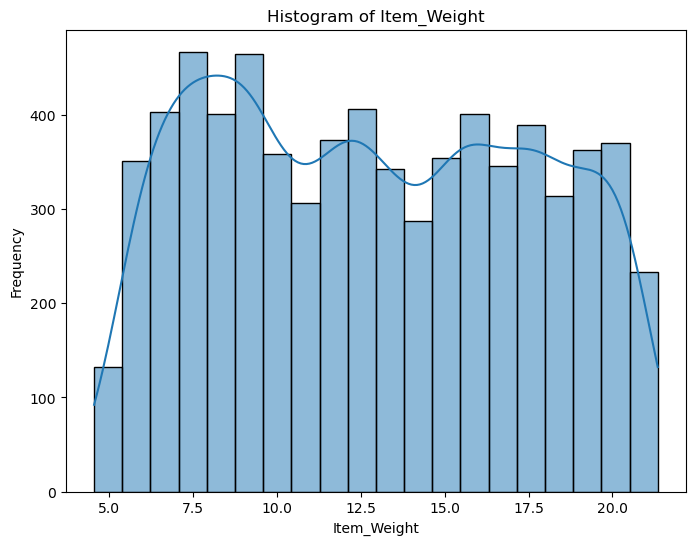

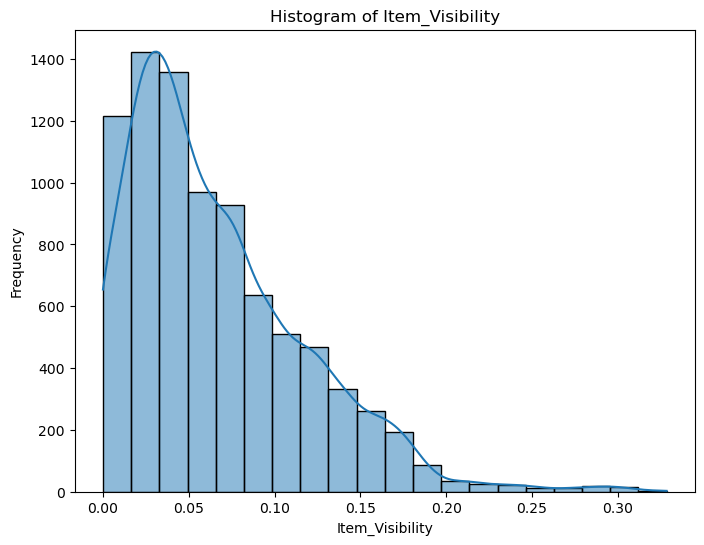

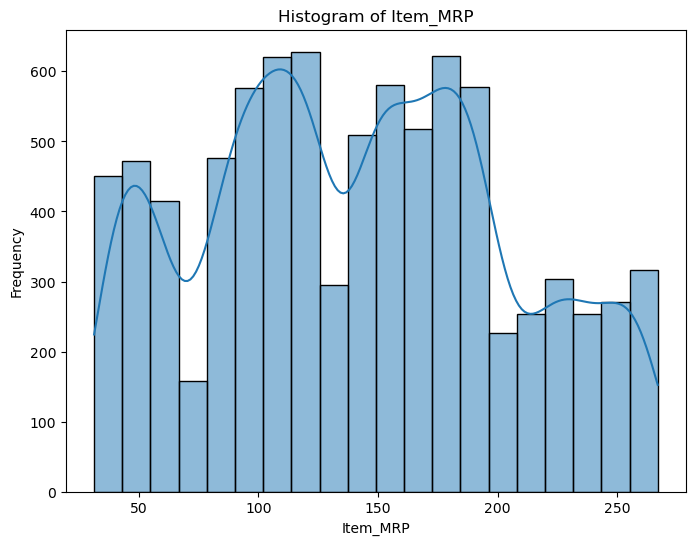

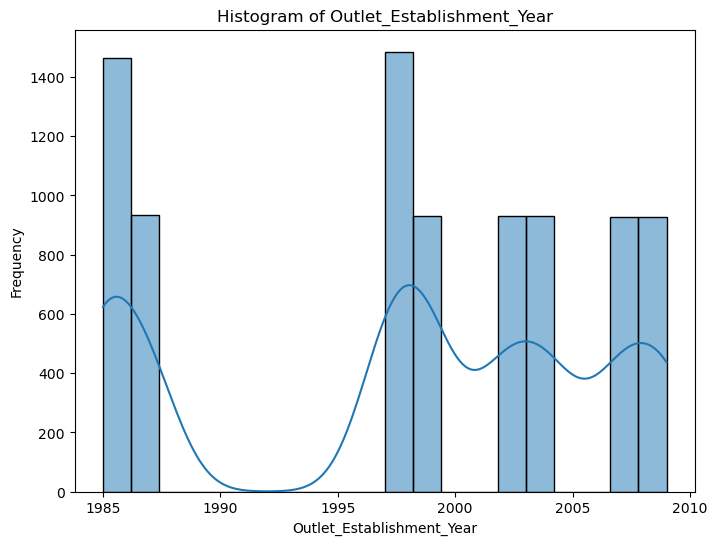

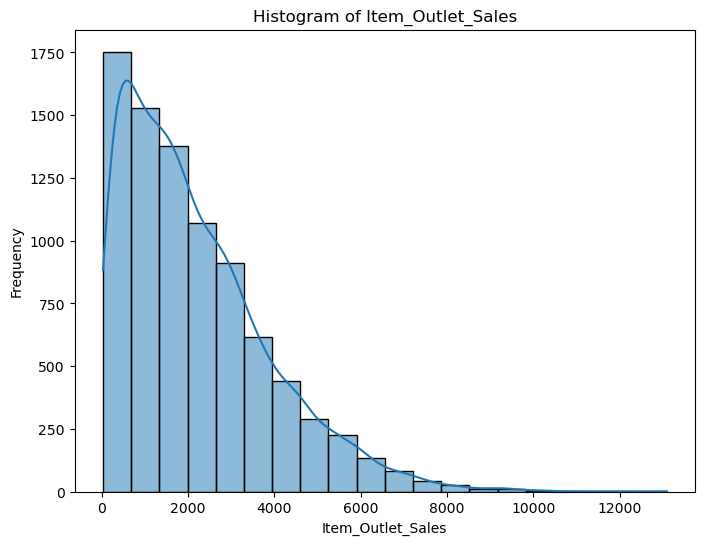

In [110]:
for column in train.select_dtypes(include=['int', 'float']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(train[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

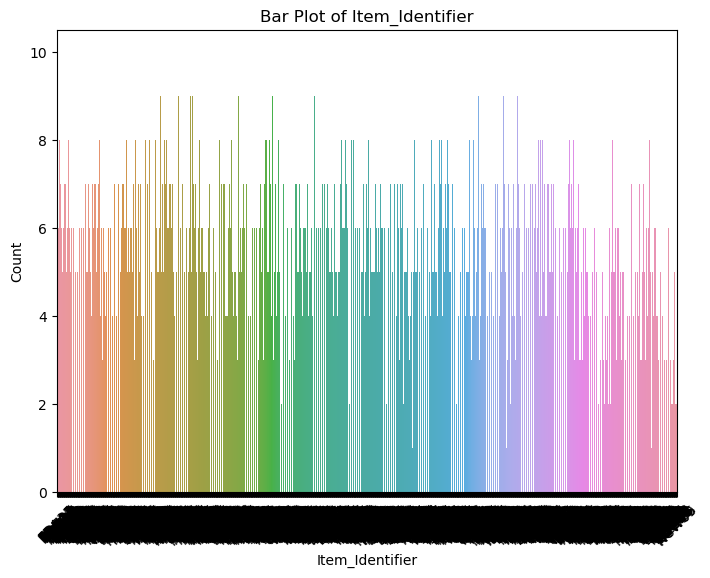

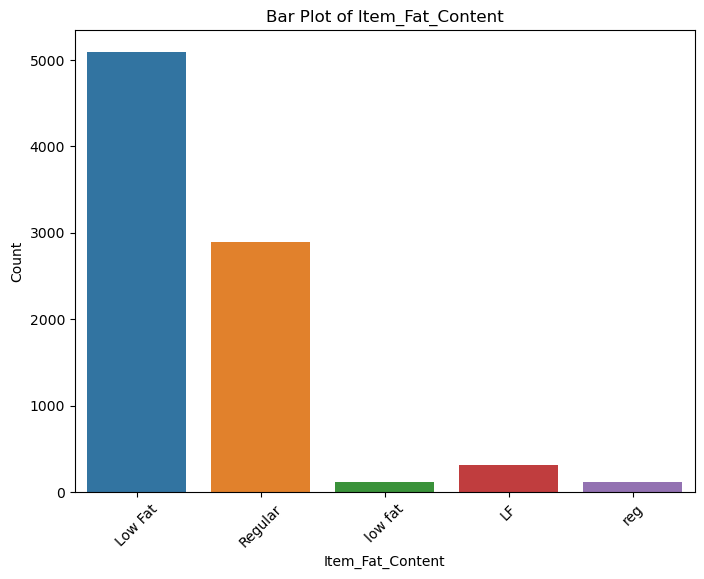

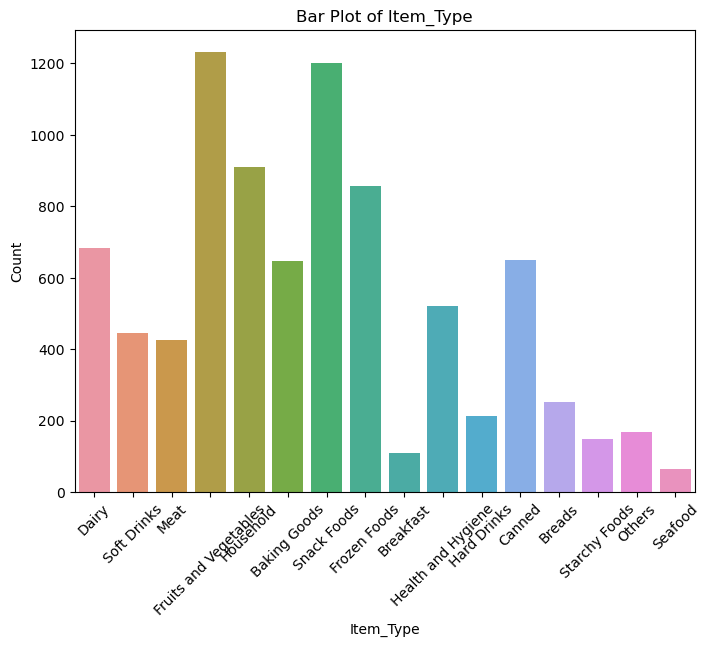

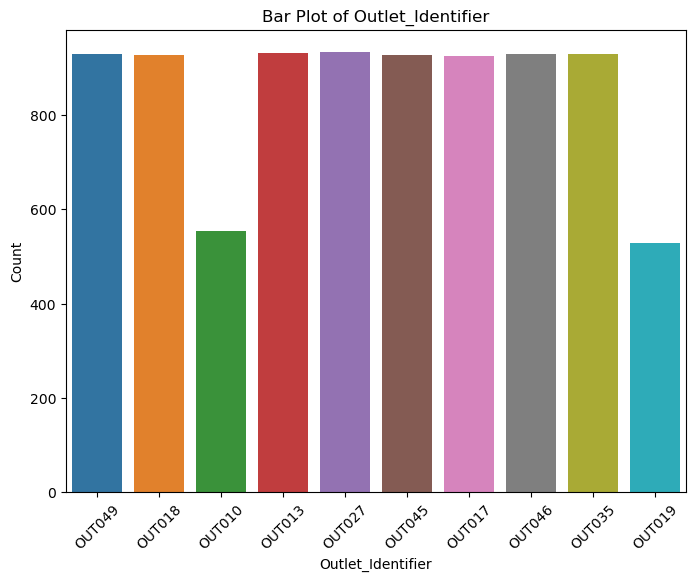

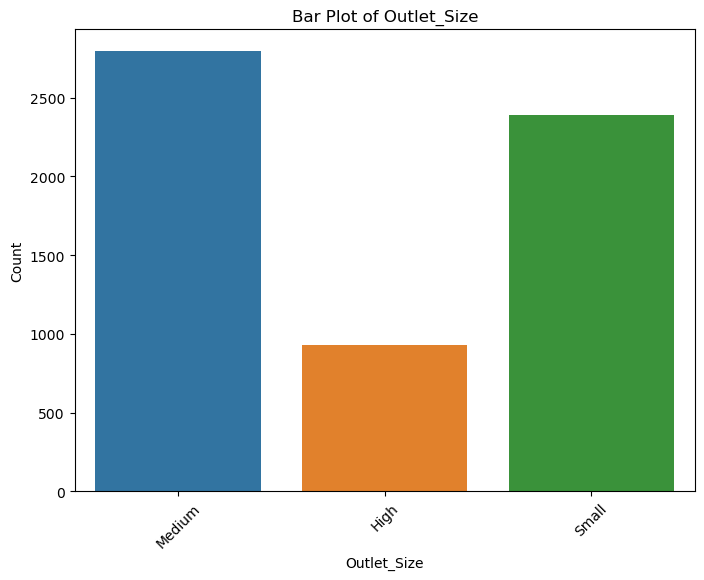

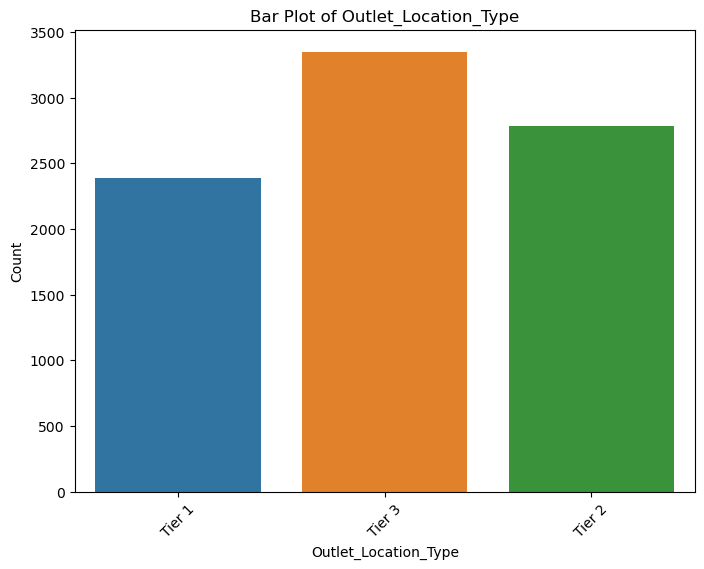

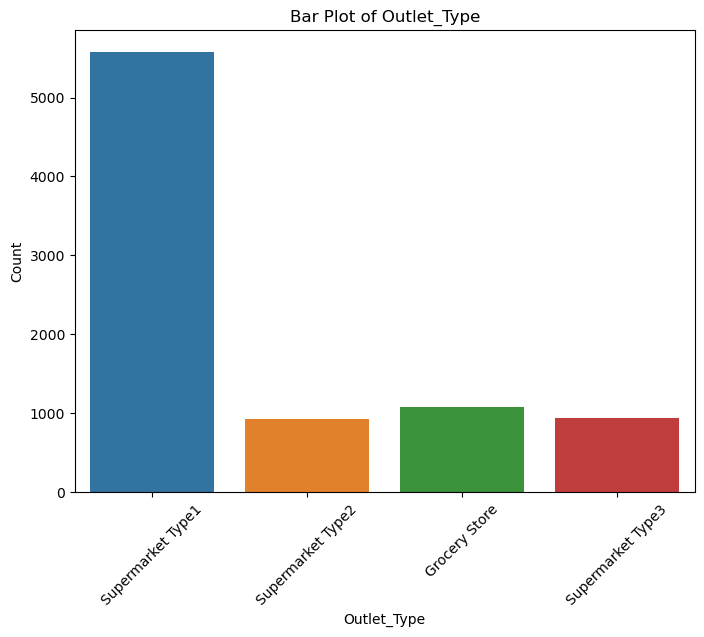

In [111]:
for column in train.select_dtypes(include='object').columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=train, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

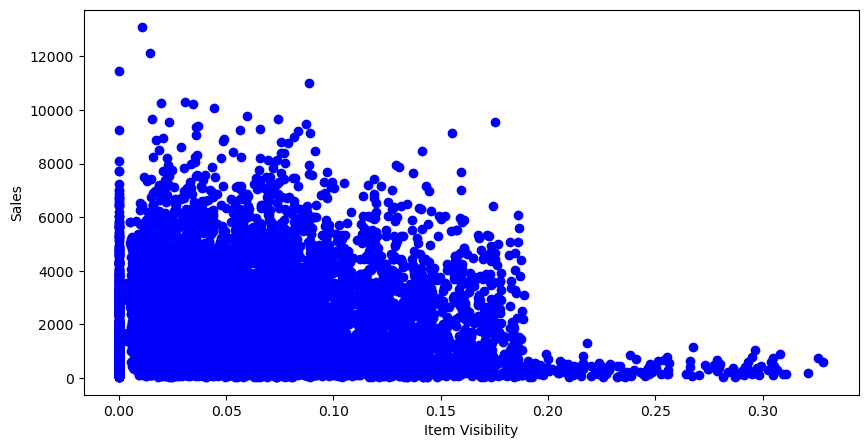

In [112]:
# Item Visibility Vs Sales
plt.figure(figsize = [10, 5])
plt.scatter(train.Item_Visibility,train.Item_Outlet_Sales, color = "blue")
plt.xlabel("Item Visibility")
plt.ylabel("Sales")
plt.show()

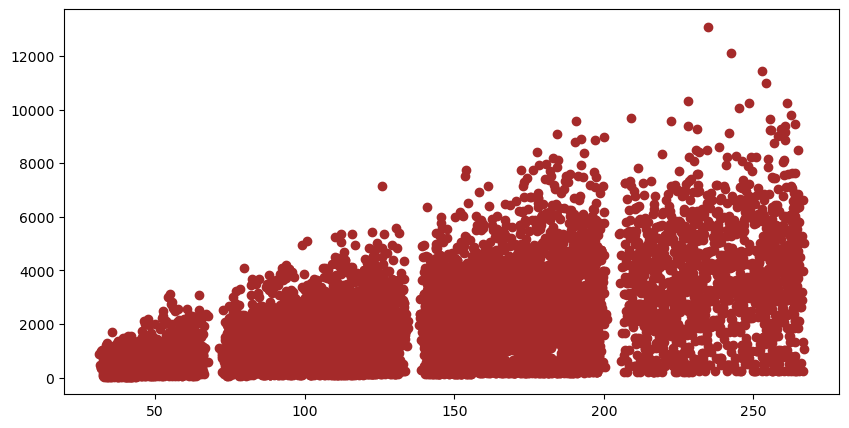

In [113]:
# Item MRP vs Sales
plt.figure(figsize = [10,5])
plt.scatter(train.Item_MRP,train.Item_Outlet_Sales, color = "brown")
plt.show()

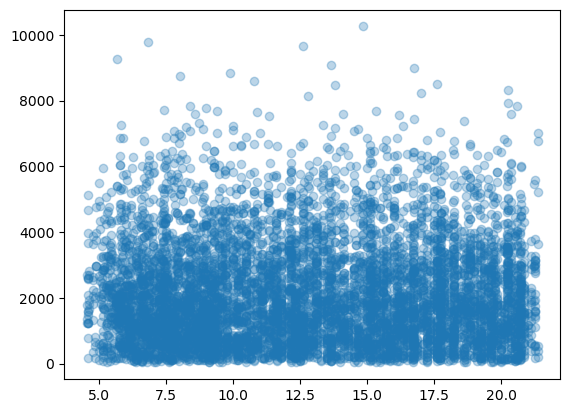

In [114]:
# Item Weight Vs Sales
plt.scatter(train.Item_Weight, train.Item_Outlet_Sales, alpha = 0.3)
plt.show()

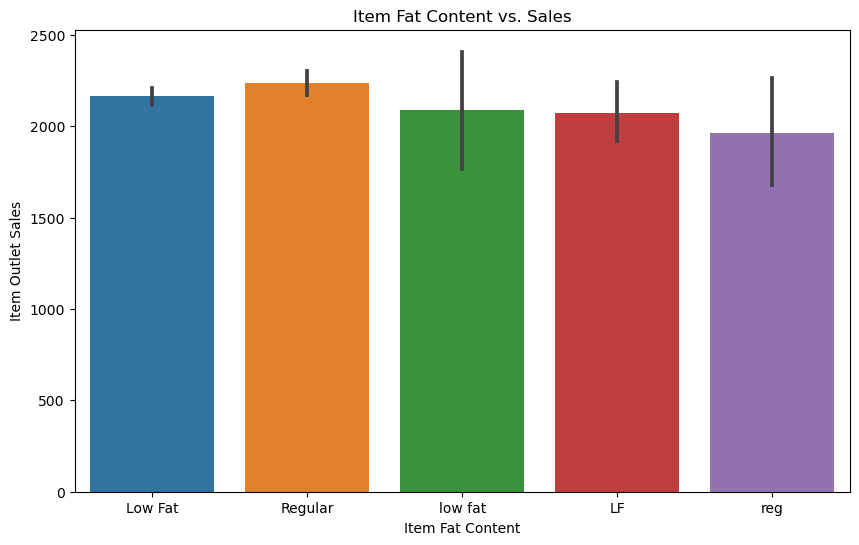

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data=train)
plt.title("Item Fat Content vs. Sales")
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.show()

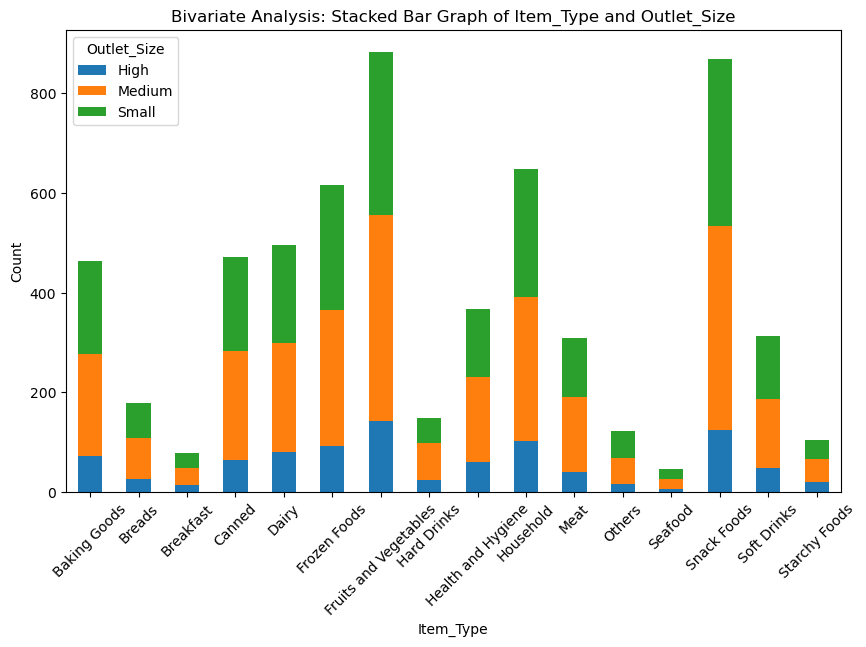

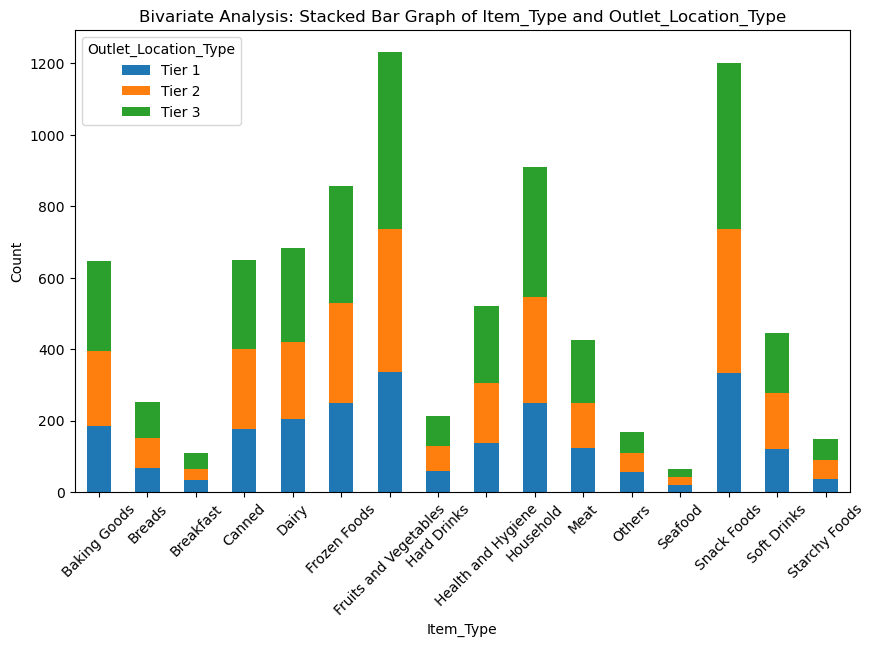

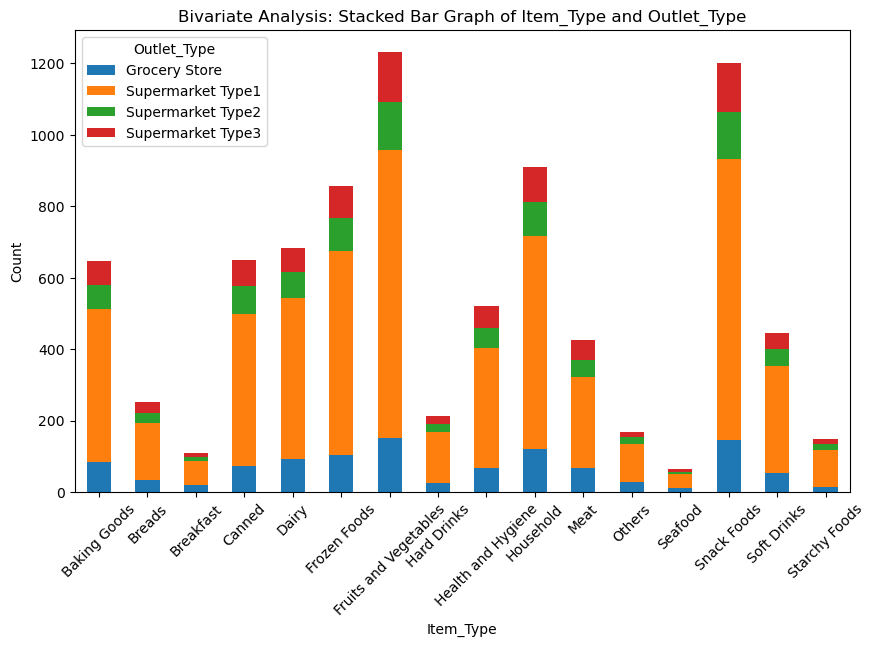

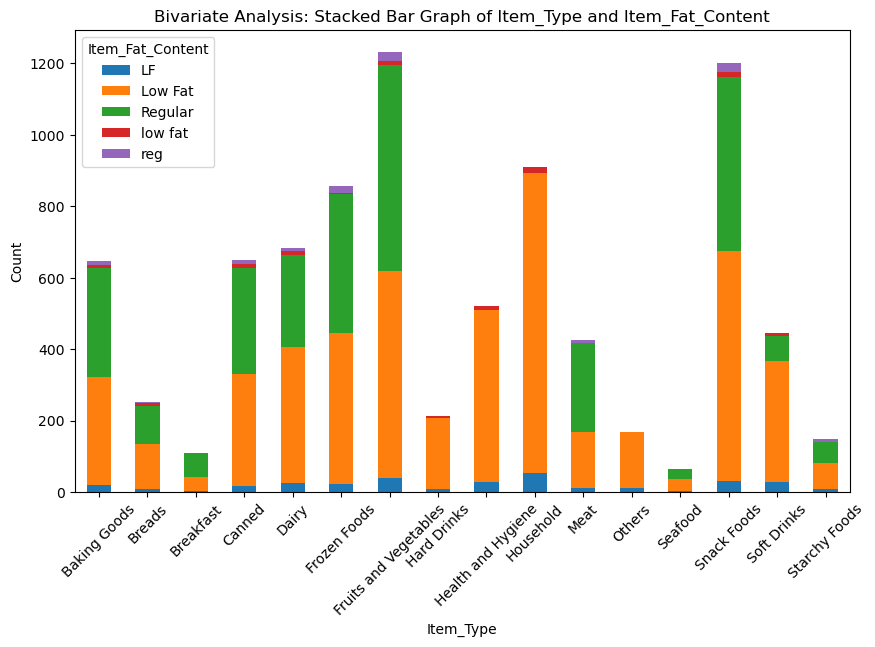

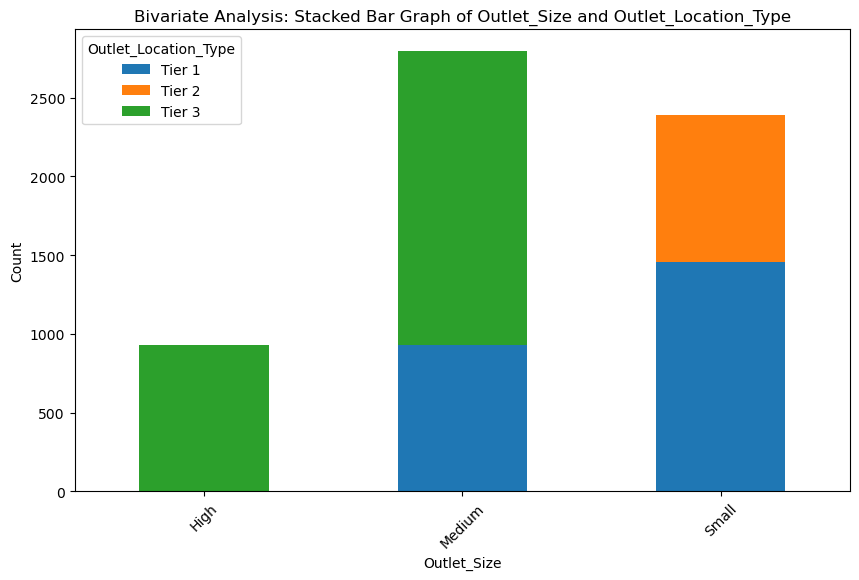

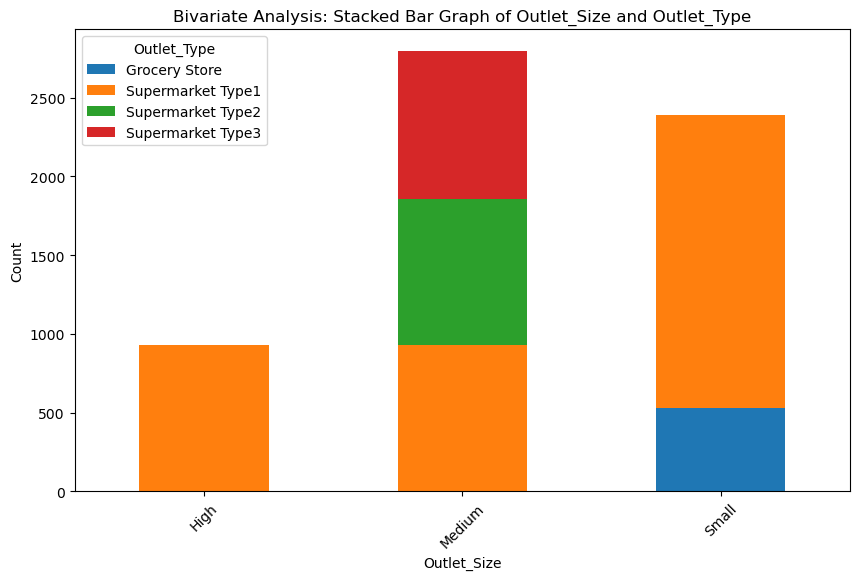

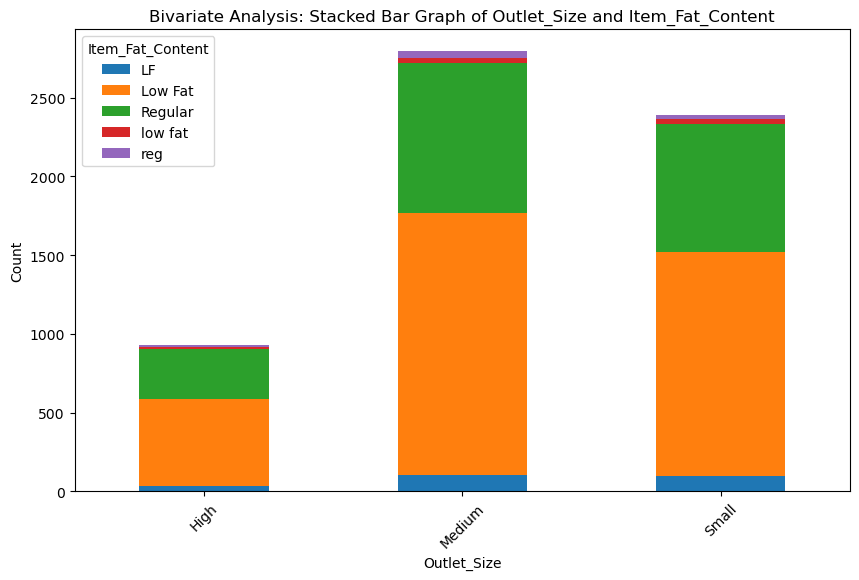

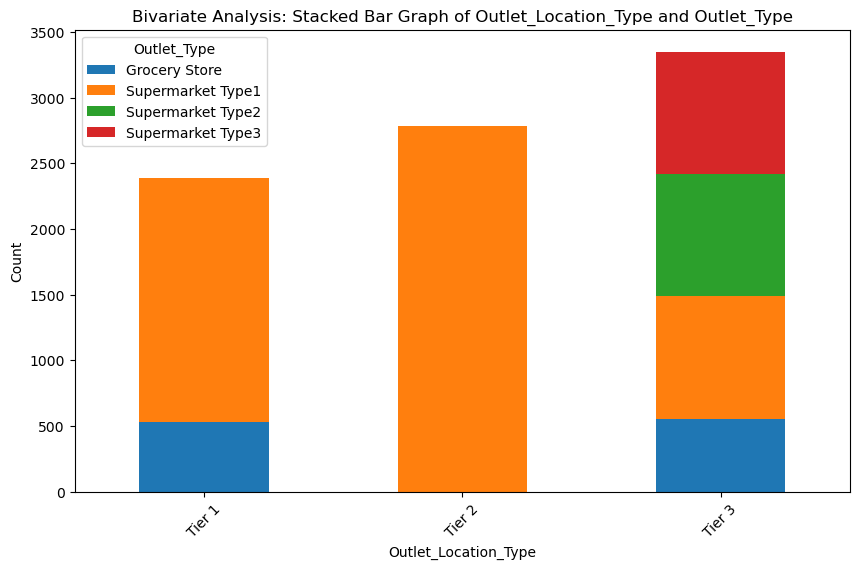

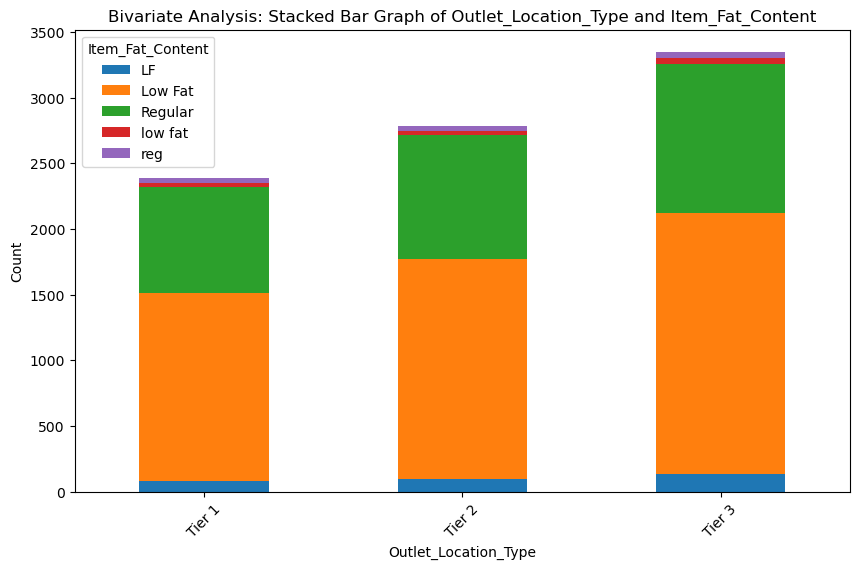

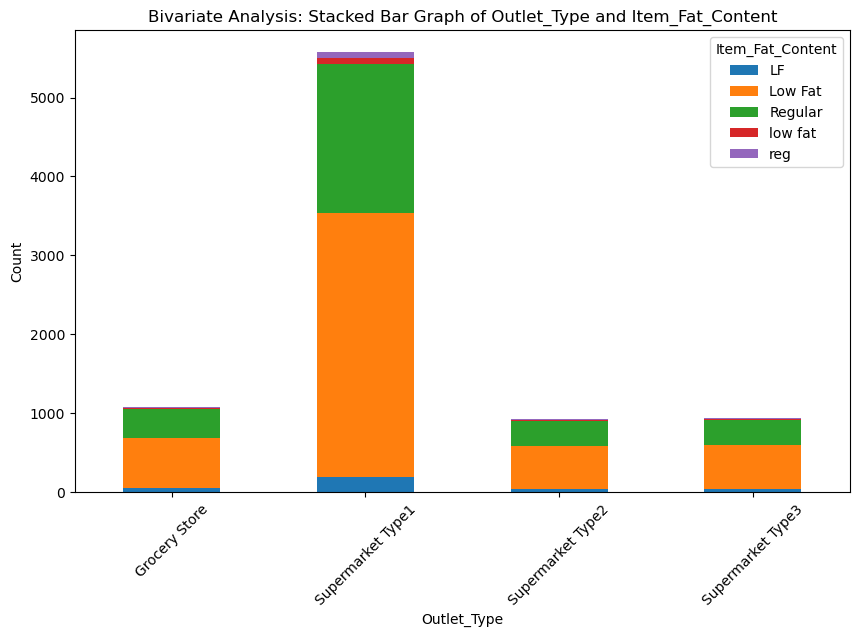

In [116]:
categorical_columns = ['Item_Type',
'Outlet_Size',
'Outlet_Location_Type',
'Outlet_Type',
'Item_Fat_Content'] 
for i in range(len(categorical_columns)):
    for j in range(i+1, len(categorical_columns)):
        # Create cross-tabulation
        cross_tab = pd.crosstab(train[categorical_columns[i]],train[categorical_columns[j]])
        
        # Plot stacked bar graph
        cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title('Bivariate Analysis: Stacked Bar Graph of {} and {}'.format(categorical_columns[i], categorical_columns[j]))
        plt.xlabel(categorical_columns[i])
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.legend(title=categorical_columns[j])
        plt.show()

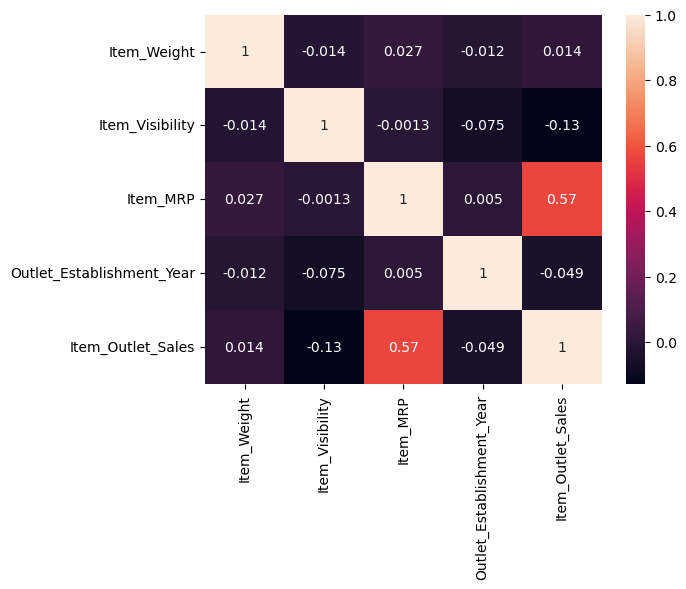

In [117]:
# Lets look at the heatmap for the co-relation 
sns.heatmap(num_columns.corr(),annot=True)
plt.show()

**Observations**:
- We have few inconsistencies in Item_Fat_Content
- Few columns have some amount of co-relation like Item_MRP and Item_Outlet_Sales.

### 4.Data Preprocessing

In [118]:
#Now lets prepare our Data for Modeling

In [119]:
# I have made a User defined function to impute the missing values
# and remove isconsistencies in 'Item_Fat_Content'
# Lets also make a new column to check the Years of Service

In [120]:
def data_prep(train):
  train['Item_Weight'] = np.where(train['Item_Weight'].isna(),train['Item_Weight'].median(skipna = True),train['Item_Weight'])
  train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(),train['Outlet_Size'].mode()[0], train['Outlet_Size'])
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('low fat', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('LF', 'Low Fat')
  train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('reg', 'Regular')
  return train

In [121]:
train_new = data_prep(train)

In [122]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [123]:
#Lets look at the 'Item_Fat_Content'
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [124]:
# Lets do a chi-square test to check the co-relation

In [125]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [126]:
train_new['Outlet_Size'].value_counts()

Outlet_Size
Medium    5203
Small     2388
High       932
Name: count, dtype: int64

In [127]:
train_new['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [128]:
pd.crosstab(train_new['Outlet_Size'], train_new['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,1855,2418
Small,1458,930,0


### 5.Data Preparation

In [129]:
# Lets prepare our Data for Modelling

In [130]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [131]:
train_new.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [132]:
train_new.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [133]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [134]:
train_new = pd.get_dummies(train_new, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [135]:
train_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,443.4228,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,2097.2700,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,732.3800,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,994.7052,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [136]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_Low Fat         8523 non-null   bool   
 5   Item_Fat_Content_Regular         8523 non-null   bool   
 6   Item_Type_Baking Goods           8523 non-null   bool   
 7   Item_Type_Breads                 8523 non-null   bool   
 8   Item_Type_Breakfast              8523 non-null   bool   
 9   Item_Type_Canned                 8523 non-null   bool   
 10  Item_Type_Dairy                  8523 non-null   bool   
 11  Item_Type_Frozen Foods           8523 non-null   bool   
 12  Item_Type_Fruits and

### 6.Data Modelling

In [137]:
#First things first
# Lets devide our Dataset in X and y

In [138]:
y = train_new['Item_Outlet_Sales']
x = train_new.drop(['Item_Outlet_Sales'], axis = 1)

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 15)

In [140]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 31)
(2131, 31)
(6392,)
(2131,)


#### 6.1 Linear Regression

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [143]:
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [144]:
from xgboost import XGBRFRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Initialize models
models = {
    
    'XGBRFRegressor': XGBRFRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'LinearRegression': LinearRegression()
}

# Fit and predict using each model
for name, model in models.items():
    model.fit(x_train_std, y_train)
    score = model.score(x_test_std, y_test)
    print(f"{name} score: {score}")


XGBRFRegressor score: 0.607176649814144
AdaBoostRegressor score: 0.4012276301846147
GradientBoostingRegressor score: 0.6047264253750266
RandomForestRegressor score: 0.5546950435027793
DecisionTreeRegressor score: 0.21688288193327043
LinearRegression score: 0.5692460269262433


In [145]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_train = lr.predict(x_train)
lr_test = lr.predict(x_test)

In [146]:
#Lets define a function for Model Evaluation
def model_eval(actual, predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  r2 = r2_score(actual, predicted)
  print('The RMSE value for the model is: ', round(rmse,2))
  print('The R2 Score for the model is: ', round(r2, 2))

In [147]:
model_eval(y_train, lr_train)

The RMSE value for the model is:  1115.61
The R2 Score for the model is:  0.56


In [148]:
model_eval(y_test, lr_test)

The RMSE value for the model is:  1170.38
The R2 Score for the model is:  0.57


#### 6.2 Random Forest Regressor

In [149]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [150]:
rf_preds_train = rf.predict(x_train)
rf_preds_test = rf.predict(x_test)

In [151]:
model_eval(y_train, rf_preds_train)

The RMSE value for the model is:  424.96
The R2 Score for the model is:  0.94


In [152]:
model_eval(y_test, rf_preds_test)

The RMSE value for the model is:  1192.84
The R2 Score for the model is:  0.55


#### 6.3Ada Boost Regressor


In [153]:
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [154]:
model_eval(y_train, preds_ada_train)

The RMSE value for the model is:  1299.84
The R2 Score for the model is:  0.4


In [155]:
model_eval(y_test, preds_ada_test)

The RMSE value for the model is:  1350.02
The R2 Score for the model is:  0.43


In [156]:
# Lets look at the feature importance
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, ada.feature_importances_):
    feats[feature] = importance 

In [157]:
feats

{'Item_Weight': 0.04471194838009838,
 'Item_Visibility': 0.16406610013663517,
 'Item_MRP': 0.4725109956381771,
 'Item_Fat_Content_Low Fat': 0.0,
 'Item_Fat_Content_Regular': 0.010975689683387116,
 'Item_Type_Baking Goods': 0.0,
 'Item_Type_Breads': 0.0,
 'Item_Type_Breakfast': 0.0,
 'Item_Type_Canned': 0.0003982580304730531,
 'Item_Type_Dairy': 0.02233875771890689,
 'Item_Type_Frozen Foods': 0.0,
 'Item_Type_Fruits and Vegetables': 0.0003245348757828791,
 'Item_Type_Hard Drinks': 0.0,
 'Item_Type_Health and Hygiene': 0.0006086719284233437,
 'Item_Type_Household': 0.011292364018324256,
 'Item_Type_Meat': 0.00012788269517680662,
 'Item_Type_Others': 0.0,
 'Item_Type_Seafood': 0.0,
 'Item_Type_Snack Foods': 0.010626398223728553,
 'Item_Type_Soft Drinks': 0.0007537943330316885,
 'Item_Type_Starchy Foods': 0.0,
 'Outlet_Size_High': 0.005590549752077504,
 'Outlet_Size_Medium': 0.0,
 'Outlet_Size_Small': 0.005836641111817473,
 'Outlet_Location_Type_Tier 1': 0.009782748617587168,
 'Outlet_Loca

#### 6.4 Gradient Boosting Regressor

In [158]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)
preds_gb_train = gb.predict(x_train)
preds_gb_test = gb.predict(x_test)

In [159]:
model_eval(y_train, preds_gb_train)

The RMSE value for the model is:  1019.53
The R2 Score for the model is:  0.63


In [160]:
model_eval(y_test,preds_gb_test )

The RMSE value for the model is:  1121.0
The R2 Score for the model is:  0.6


#### 6.5 XG Boost Regressor

In [161]:
import xgboost as xg

In [162]:
xgb = xg.XGBRegressor()

In [163]:
xgb.fit(x_train, y_train)
preds_xgb_train = xgb.predict(x_train)
preds_xgb_test = xgb.predict(x_test)

In [164]:
model_eval(y_train, preds_xgb_train)

The RMSE value for the model is:  628.25
The R2 Score for the model is:  0.86


In [165]:
model_eval(y_test, preds_xgb_test)

The RMSE value for the model is:  1222.32
The R2 Score for the model is:  0.53


#### 6.5 SGD Regressor

In [166]:
from sklearn.linear_model import SGDRegressor

In [167]:
sgd = SGDRegressor()
sgd.fit(x_train, y_train)
preds_train_sgd = sgd.predict(x_train)
preds_test_sgd = sgd.predict(x_test)

In [168]:
model_eval(y_train,preds_train_sgd )

The RMSE value for the model is:  3741126880546.39
The R2 Score for the model is:  -4.959355872400241e+18


In [169]:
model_eval(y_test, preds_test_sgd)

The RMSE value for the model is:  3742536981240.42
The R2 Score for the model is:  -4.4045694288462356e+18


### 7.Hypertuning

In [170]:
# Lets try and hypertune our model and see if we can further improve the RMSE and R2 Score

In [171]:
#Based on the bias variance trade off I have tried to hypertune Gradient Boosting Regressor using RandomizedSearchCV

In [172]:
from sklearn.model_selection import RandomizedSearchCV

In [173]:
# Number of estimators
n_estimators = [int(x) for x in np.linspace(start=50, stop=300, num=10)]

# Number of features to consider at every split
max_features = ['log2', 'sqrt']

# Maximum number of levels
max_depth = [int(x) for x in np.linspace(3, 15, num=5)] + [None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Learning Rate
l_rate = [0.01, 0.05, 0.1, 0.5]

In [174]:
# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'learning_rate': l_rate
}


In [175]:
# Randomized Search CV setup
gb_clf = RandomizedSearchCV(estimator=gb, param_distributions=random_grid, n_iter=100, cv=3, random_state=123, n_jobs=-1)

In [176]:
# Lets fit the Randomized Search CV to our data
gb_clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                                        'max_depth': [3, 6, 9, 12, 15, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                                         300]},
                   random_state=123)

In [177]:
# Get the best parameters and best score
print("Best Parameters:", gb_clf.best_params_)
print("Best Score:", gb_clf.best_score_)

Best Parameters: {'n_estimators': 105, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.5858021009824074


In [178]:
gb2 = GradientBoostingRegressor(n_estimators=105,min_samples_split= 2,min_samples_leaf= 1,
                                max_features='sqrt',max_depth= 3,learning_rate= 0.1)
gb2.fit(x_train, y_train)
preds_gb2_train = gb2.predict(x_train)
preds_gb2_test = gb2.predict(x_test)

In [179]:
model_eval(y_train, preds_gb2_train)

The RMSE value for the model is:  1046.66
The R2 Score for the model is:  0.61


In [180]:
model_eval(y_test,preds_gb2_test )

The RMSE value for the model is:  1133.12
The R2 Score for the model is:  0.6


### 8.Test Data Application

In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [182]:
data_prep(test)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [183]:
test['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

In [184]:
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], inplace = True, axis = 1)

In [185]:
test_new = pd.get_dummies(test, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [186]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      5681 non-null   float64
 1   Item_Visibility                  5681 non-null   float64
 2   Item_MRP                         5681 non-null   float64
 3   Item_Fat_Content_Low Fat         5681 non-null   bool   
 4   Item_Fat_Content_Regular         5681 non-null   bool   
 5   Item_Type_Baking Goods           5681 non-null   bool   
 6   Item_Type_Breads                 5681 non-null   bool   
 7   Item_Type_Breakfast              5681 non-null   bool   
 8   Item_Type_Canned                 5681 non-null   bool   
 9   Item_Type_Dairy                  5681 non-null   bool   
 10  Item_Type_Frozen Foods           5681 non-null   bool   
 11  Item_Type_Fruits and Vegetables  5681 non-null   bool   
 12  Item_Type_Hard Drink

In [187]:
test_new['Item_Outlet_Sales'] = gb2.predict(test_new)

In [188]:
test_new.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Outlet_Sales
0,20.750,0.007565,107.8622,True,False,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,1719.408021
1,8.300,0.038428,87.3198,False,True,False,False,False,False,True,...,True,False,False,True,False,False,True,False,False,1289.268126
2,14.600,0.099575,241.7538,True,False,False,False,False,False,False,...,True,False,False,False,True,True,False,False,False,1107.467205
3,7.315,0.015388,155.0340,True,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,2427.738667
4,12.500,0.118599,234.2300,False,True,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,5098.530537
